<h3>CMM Sample Data Principal Components Analysis - Results and Interpretation</h3>

<h4>Initial Data Load:</h4>

In [1]:
fpath='/Users/paulp/GoogleDrive/projects/ContinentalMarginMapping/data/GCS_EDA_sampling/'
file='CMM_20krandompnts.csv'

df = pd.read_csv(fpath+file, names=['ID','CrustThk','Elevation','Magnetic','Gravity','gForms'], skiprows=1).dropna()

<h4>Data Preprocessing:</h4>

In [2]:
# import the scikit PCA, Standardizer, and Matplotlib plotting handlers:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

%matplotlib inline

# build the arrays needed for PCA and other machine analysis from the df:
X = df.ix[:,1:5]      # extract the fields in df that will participate in the PCA
y = df.ix[:,5]        # extract the geomorphon type classifier field only

# standardize (mean=0, sd=1) the X array prior to generating covariance matrix:
X_std = StandardScaler().fit_transform(X)

# generate the covariance matrix from the standardized X data:
# NOTE that you could also run the PCA on the correlation matrix of X (same thing, right?)
X_cov = np.cov(X_std.T)
print('Standardized Covariance Matrix:\n', X_cov)

Standardized Covariance Matrix:
 [[ 1.00005175 -0.90563622 -0.01321336  0.92149715]
 [-0.90563622  1.00005175  0.00943652 -0.97859544]
 [-0.01321336  0.00943652  1.00005175 -0.00664968]
 [ 0.92149715 -0.97859544 -0.00664968  1.00005175]]


<h4>'Fit' the PCA Model:</h4>

In [4]:
Y = PCA(n_components=4).fit(X_std)

e_vecs = Y.components_.T                 # the eigenvectors (transposing places vec components in single list)
e_vals = Y.explained_variance_           # the eigenvalues

print('Results:\n')
print('Eigenvectors:\n', e_vecs)
print('')
print('Eigenvalues:\n', e_vals)
print('')
print('Variance explained by each principal component:\n', Y.explained_variance_ratio_)
print('')
print('Percentage of variance explained by each principal component:\n', Y.explained_variance_ratio_ * 100)
print('')
print('Cumulative percentage variance explained by each principal component:\n', np.cumsum(Y.explained_variance_ratio_*100))

Results:

Eigenvectors:
 [[-0.56824898  0.0010699  -0.81815639  0.08781836]
 [ 0.58023344 -0.00578616 -0.4740883  -0.66222047]
 [ 0.00901297  0.99994526 -0.00468264  0.00251241]
 [-0.58338753  0.00865151  0.32532826 -0.74414089]]

Eigenvalues:
 [ 2.87089545  0.99987373  0.10877096  0.02045986]

Variance explained by each principal component:
 [ 0.71772386  0.24996843  0.02719274  0.00511496]

Percentage of variance explained by each principal component:
 [ 71.77238635  24.99684329   2.71927398   0.51149639]

Cumulative percentage variance explained by each principal component:
 [  71.77238635   96.76922964   99.48850361  100.        ]


<h4>Creating the Scree Plot for the Computed Principal Components:</h4>

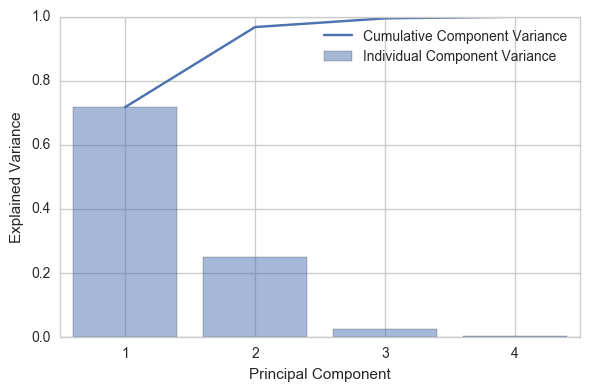

In [5]:
# Creating the scree plot, or something similar, as a visual aid in distinguishing between significant and not-significant
# principal components...

npc = range(1, Y.n_components_+1)   # Y.n_components_ was computed earlier as part of the PCA model fit...

with plt.style.context('seaborn-whitegrid'):
    plt.plot(npc, np.cumsum(Y.explained_variance_ratio_), label='Cumulative Component Variance')
    plt.bar(npc, Y.explained_variance_ratio_, alpha = 0.5, align='center',label='Individual Component Variance')
    plt.xticks([1,2,3,4])
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [8]:
### if we want to preserve explanation for 95% of the variance measured in the original data (X), we require p
### principal components to be retained...

print('To retain a variance accountability level of 95%, you should retain the first', PCA(0.965).fit(X_std).n_components_, 'principal components')


To retain a variance accountability level of 95%, you should retain the first 2 principal components


<h4>Interpreting the Initial Results:</h4>

__Variance Accounting:__
- Principal Component 1:  71.8%
- Principal Component 2:  25%
- Principal Component 3:  2.7%
- Principal Component 4:  0.5%

Principal components 1 and 2 account for ~72 and 25 percent, respectively, or in total about 97% of the variance in the original data. The remaining components, 3 and 4, account for less than 3%, so we can (IMHO) safely discard these two 
components, and focus all further attention on interpreting PC1 and PC2...

<h4>Further Interpretation(s) - Plot the Principal Component Loadings:</h4>

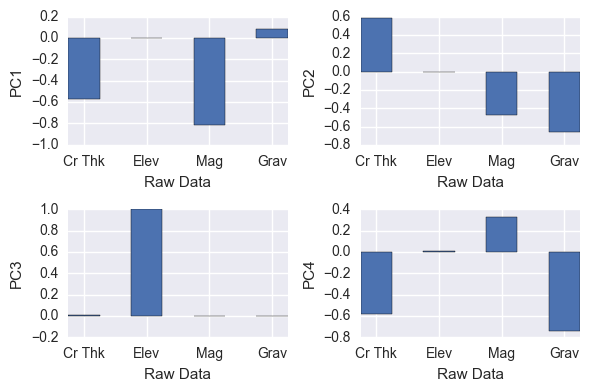

In [56]:
# The Principal Component Loadings map the Eigenvector coefficients back to the original variables in the data set. This
# then helps to ascertain and interpret the contribution of the original data to each principal component 
# (Eigenvector, Eignevalue set)

# the original variables: ['X1', 'X2', 'X3', 'X4' ]  map to crustal thkness, elevation, magnetism, and gravity, respectively
# the Eigenvectors are retrieved from the model as the components_: Y.components_.T
#
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

e_vecs = Y.components_.T 

# Set the ticks and ticklabels for all axes
plt.setp(((ax1,ax2), (ax3,ax4)), xticks=[1,2,3,4], xticklabels=['Cr Thk', 'Elev', 'Mag', 'Grav' ], xlabel=('Raw Data'))

ax1.bar([1, 2, 3, 4 ], e_vecs[0], width=0.5, align='center' )
ax1.set_ylabel('PC1')

ax2.bar([1, 2, 3, 4 ], e_vecs[1], width=0.5, align='center' )
ax2.set_ylabel('PC2')

ax3.bar([1, 2, 3, 4 ], e_vecs[2], width=0.5, align='center' )
ax3.set_ylabel('PC3')

ax4.bar([1, 2, 3, 4 ], e_vecs[3], width=0.5, align='center' )
ax4.set_ylabel('PC4')

fig.tight_layout()
plt.show()

In [19]:
Y.components_.T

array([[-0.56824898,  0.0010699 , -0.81815639,  0.08781836],
       [ 0.58023344, -0.00578616, -0.4740883 , -0.66222047],
       [ 0.00901297,  0.99994526, -0.00468264,  0.00251241],
       [-0.58338753,  0.00865151,  0.32532826, -0.74414089]])